<a href="https://colab.research.google.com/github/YI-CHENG-SHIH645/ML-in-Business_practice/blob/main/ch1/ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Models

*   Supervised learning
*   Unsupervised learning
*   Semi-supervised learning
*   Reinforcement learning

# Validation and Testing
    
*   several models
*   overfitting
*   underfitting
*   bias-variance trade-off

# Data Cleaning

*   Inconsistent Recording
*   Unwanted Observations
*   Duplicate Observations
*   Outliers
*   Missing Data

# Bayes' theorem
$P(X {\cap} Y) = P(X|Y) * P(Y) = P(Y {\cap} X) =  P(Y|X) * P(X)$
*   naive bayes classifier



In [1]:
!wget "https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/main/utils.py"

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from functools import partial
from utils import DataLoader, display_side_by_side
from sklearn.metrics import mean_squared_error

--2021-03-17 09:07:49--  https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/main/utils.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML-in-Business_practice/main/utils.py [following]
--2021-03-17 09:07:49--  https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML-in-Business_practice/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7290 (7.1K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   7.12K  --.-KB/s    in 0s      

2021-03-17 09:07:49 (76.4 MB/s) - ‘utils.py’ saved [7290/7290]



EXERCISES 1.11

In [12]:
training_set = DataLoader.load_data('age_salary_url', 'train')
validation_set = DataLoader.load_data('age_salary_url', 'val')
test_set = DataLoader.load_data('age_salary_url', 'test')

training_set.name = 'train'
validation_set.name = 'val'
test_set.name = 'test'

In [7]:
display_side_by_side([training_set, validation_set, test_set], ['train', 'vali', 'test'])

train,vali,test
,Age,Salary
0,25,135000
1,55,260000
2,27,105000
3,35,220000
4,60,240000
5,65,265000
6,45,270000
7,40,300000
8,50,265000


In [8]:
def get_poly(x, y, deg: int):
    weights = np.polyfit(x=x,
                         y=y,
                         deg=deg)
    return np.poly1d(weights)

def get_rmse(x, y, p):
    return sqrt(mean_squared_error(y_true=y,
                                   y_pred=x.apply(lambda x: p(x))))

In [13]:
df = pd.DataFrame()
models = {}

x_train, y_train = training_set.Age, training_set.Salary
x_vali, y_vali = validation_set.Age, validation_set.Salary
for deg in [5, 4, 3, 2, 1]:
    p = get_poly(x_train, y_train, deg=deg)
    models['poly_'+str(deg)] = p
    df.loc['training_set', 'poly_'+str(deg)] = get_rmse(x_train, y_train, p=p)
    df.loc['validation_set', 'poly_'+str(deg)] = get_rmse(x_vali, y_vali, p=p)
df.astype(int)

,poly_5,poly_4,poly_3,poly_2,poly_1
training_set,12240,20704,30346,31242,47179
validation_set,36832,35530,36187,34348,50590


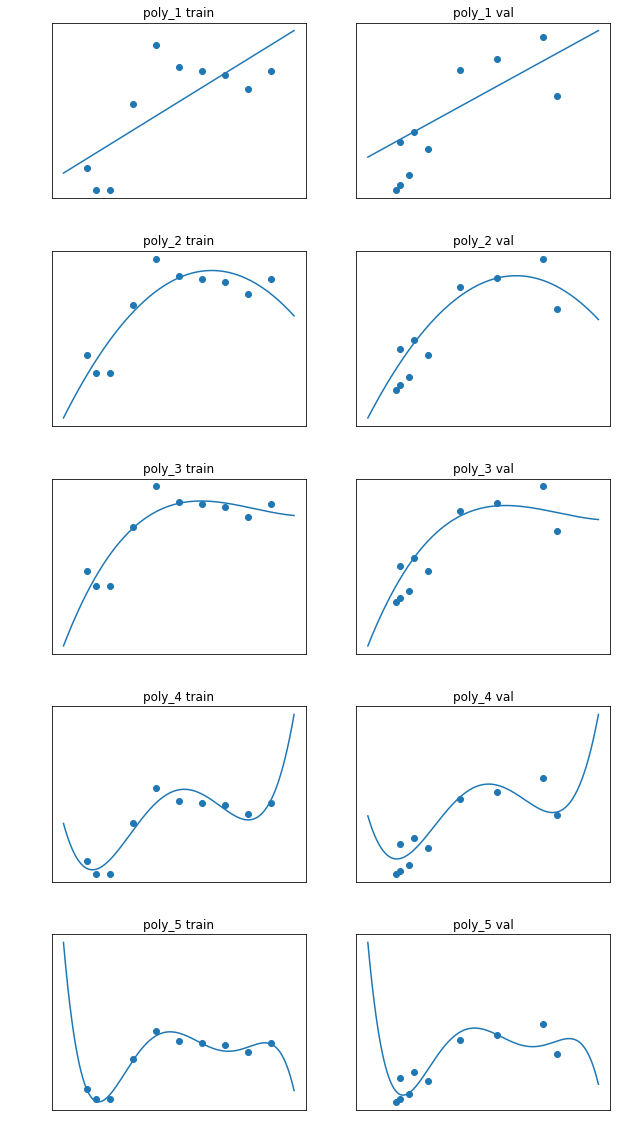

In [23]:
fig = plt.figure(figsize=(10, 20), edgecolor='w')
x = np.linspace(20, 70, num=1000)

for nth, (i, j) in enumerate(itertools.product(range(1, 6), range(1, 3))):
    salary = [models['poly_' + str(i)](age) for age in x]
    ax = fig.add_subplot(5, 2, nth+1)
    ax.tick_params(axis='both', colors='w')
    dataset = training_set if j%2 == 1 else validation_set
    ax.set_title('poly_' + str(i) + ' ' + dataset.name, color='black')
    ax.plot(x, salary)
    ax.scatter(dataset.Age, dataset.Salary)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [17]:
int(get_rmse(test_set.Age, test_set.Salary, p=models['poly_2']))

35005

EXERCISES 1.12

X: the email is spam, P(X) = 0.25 <br>
Y: the email contains a particular word, P(Y) = 0.125 <br>

P(Y|X) = 0.4

P(X|Y) = ?

In [18]:
p_x = 0.25
p_y = 0.125
p_y_under_x = 0.4

In [19]:
p_x_under_y = p_y_under_x * p_x / p_y
p_x_under_y

0.8